### Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Functions

In [37]:
def pct_change_col_adder(df,col_name):
    df[col_name] = df["Close"].pct_change(1)
    return df

def make_dataset(df, col1, col2):
    df.dropna(inplace=True)
    X = df[[col1]].to_numpy()
    Y = df[[col2]].to_numpy()
    return X, Y


def predict(model, X, Y):
    X_predict = np.linspace(X.min(), X.max(), 5).reshape(-1, 1)
    Y_predict = model.predict(X_predict)
    
    return X_predict, Y_predict

### Load Data

In [2]:
spy = pd.read_csv("SPY.csv", index_col=0, parse_dates=True)

In [4]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [6]:
spy = pct_change_col_adder(spy,"SPY")

In [7]:
index = pd.read_csv("sp500sub.csv", index_col=0, parse_dates=True)

In [8]:
aapl = index[index["Name"]=="AAPL"].copy()

In [9]:
aapl=pct_change_col_adder(aapl,"AAPL")

In [10]:
joined = aapl[["AAPL"]].join(spy["SPY"])

In [14]:
joined.head()

,AAPL,SPY
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,0.002647
2010-01-06,-0.015906,0.000704
2010-01-07,-0.001849,0.004221
2010-01-08,0.006648,0.003328


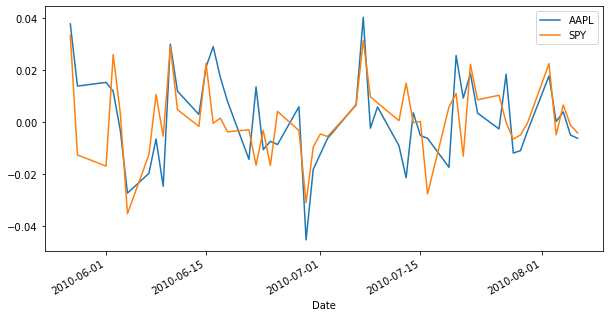

In [17]:
joined.iloc[100:150].plot(figsize=(10, 5));

<AxesSubplot:xlabel='SPY', ylabel='AAPL'>

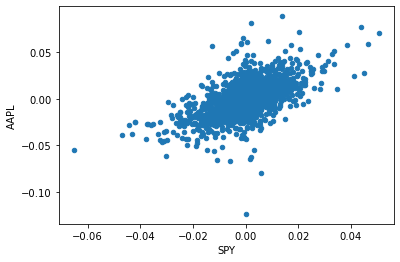

In [18]:
joined.plot.scatter("SPY", "AAPL")

### Make the dataset

In [33]:
X, Y = make_dataset(joined, "SPY", "AAPL")

In [34]:
X.shape, Y.shape

((2262, 1), (2262, 1))

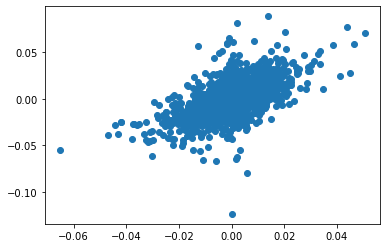

In [35]:
plt.scatter(X, Y);

### Define and fit model

In [36]:
model = LinearRegression()
model.fit(X, Y);

In [38]:
X_predict, Y_predict = predict(model, X, Y)

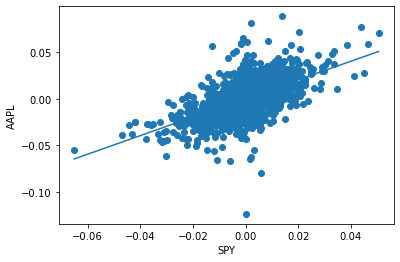

In [39]:
plt.scatter(X, Y);
plt.xlabel("SPY");
plt.ylabel("AAPL");
plt.plot(X_predict, Y_predict);

In [40]:
beta = model.coef_
alpha = model.intercept_
alpha, beta

(array([0.00046298]), array([[0.99836387]]))

In [41]:
Y_predict = beta * X_predict + alpha

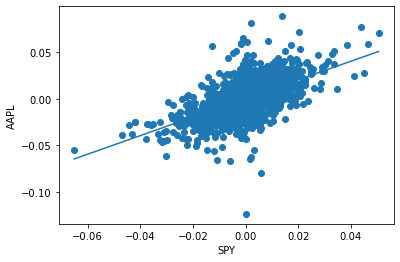

In [42]:
plt.scatter(X, Y);
plt.xlabel("SPY");
plt.ylabel("AAPL");
plt.plot(X_predict, Y_predict);

In [43]:
joined.std()

AAPL    0.016201
SPY     0.009430
dtype: float64

In [44]:
joined["AAPL"].std() / joined["SPY"].std()

1.7179632360403783

In [45]:
# which is more volatile? The one with the higher std... So it is more risky